In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
from imblearn.over_sampling import SMOTE

In [2]:
# Load the data
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
# Data Exploration
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [5]:
print(data.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [7]:
print(data.dtypes)


Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [8]:
print(data.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

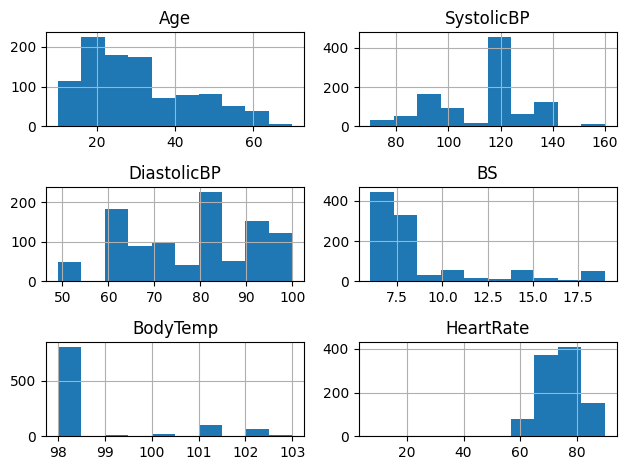

In [10]:
# Visualize the distribution of features
plt.figure(figsize=(15, 10))
data.hist()
plt.tight_layout()
plt.show()

In [9]:
# Check the distribution of the target variable
print(data['RiskLevel'].value_counts(normalize=True))

RiskLevel
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64


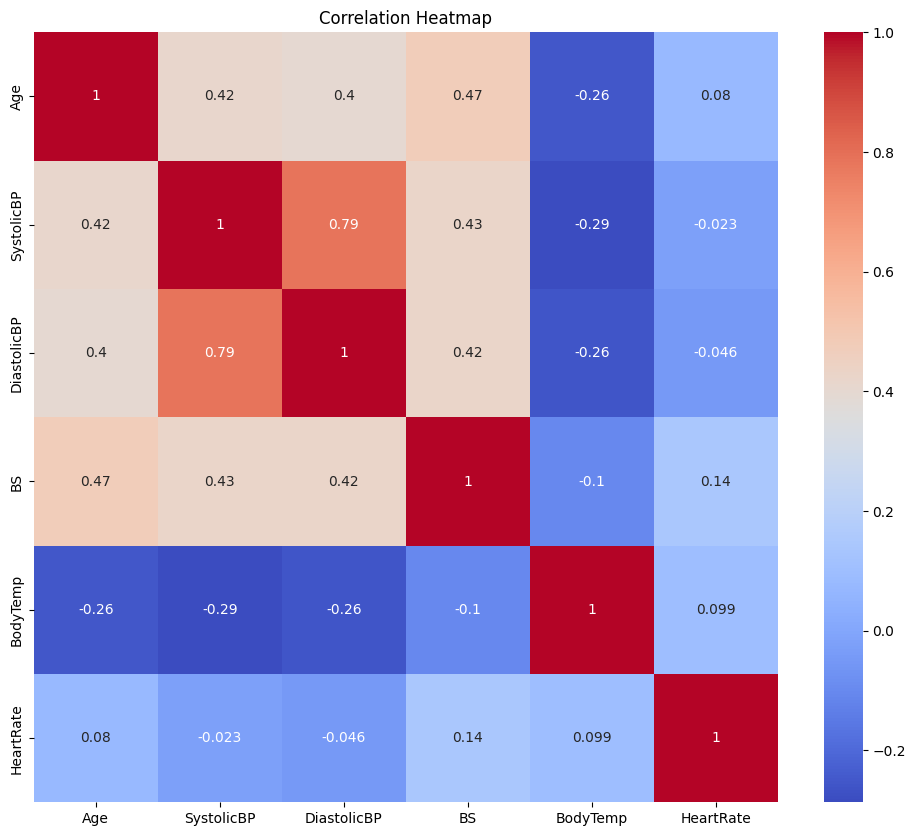

In [11]:
# Visualizations
numeric_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

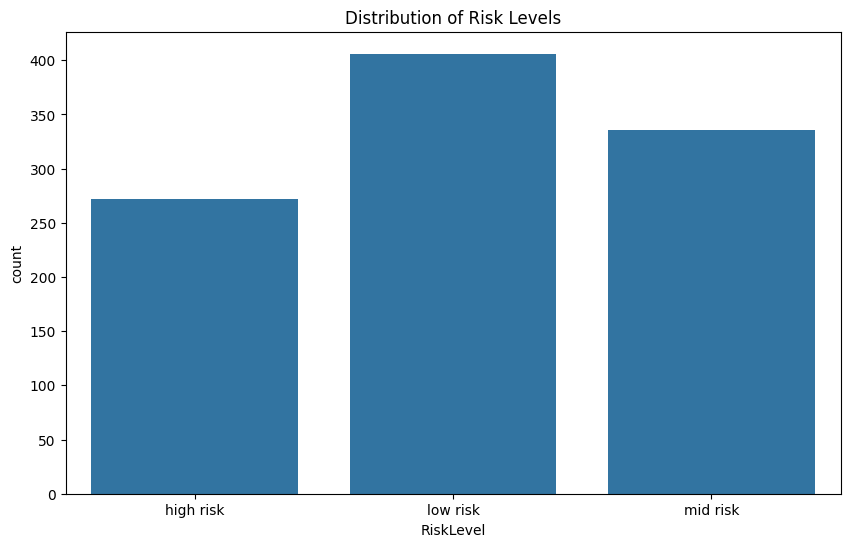

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RiskLevel', data=data)
plt.title('Distribution of Risk Levels')
plt.show()

In [13]:
# Preprocessing
# Encode the target variable
data['RiskLevel'] = pd.Categorical(data['RiskLevel']).codes

In [14]:
# Separate features and target
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [18]:
# Calculate cosine similarity
similarity_matrix = cosine_similarity(X_train_resampled)

In [19]:
# Function to find similar patients
def find_similar_patients(patient_index, top_n=5):
    patient_similarities = similarity_matrix[patient_index]
    similar_indices = patient_similarities.argsort()[::-1][1:top_n+1]
    similar_patients = X_train.iloc[similar_indices]
    similarities = patient_similarities[similar_indices]
    return similar_patients, similarities

In [20]:
# Models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(random_state=42))
]

In [21]:
# Neural Network
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Logistic Regression Results:
Accuracy: 0.6355
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        47
           1       0.62      0.80      0.70        80
           2       0.60      0.33      0.42        76

    accuracy                           0.64       203
   macro avg       0.64      0.66      0.63       203
weighted avg       0.63      0.64      0.61       203



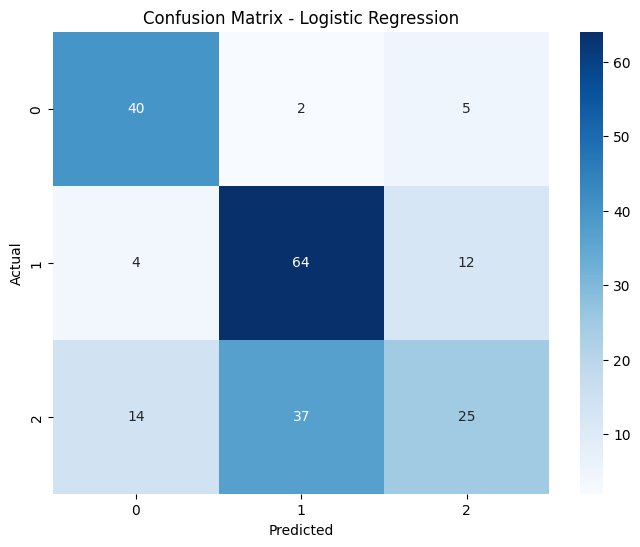


Random Forest Results:
Accuracy: 0.8030
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.86      0.74      0.79        80
           2       0.74      0.84      0.79        76

    accuracy                           0.80       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



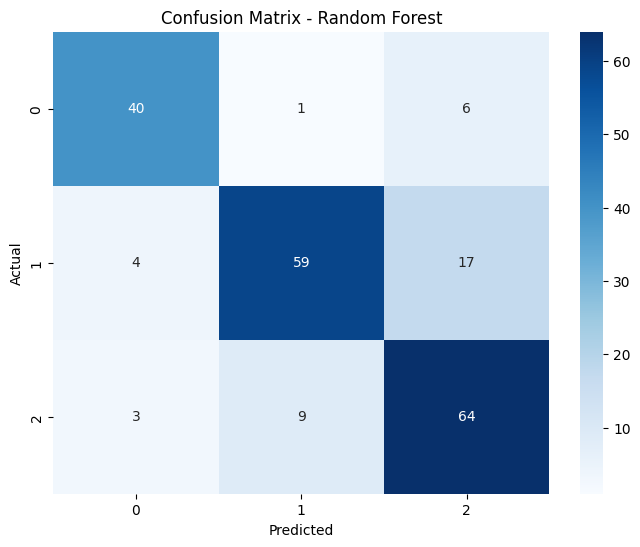


Gradient Boosting Results:
Accuracy: 0.7635
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.77      0.75      0.76        80
           2       0.71      0.74      0.72        76

    accuracy                           0.76       203
   macro avg       0.78      0.77      0.77       203
weighted avg       0.76      0.76      0.76       203



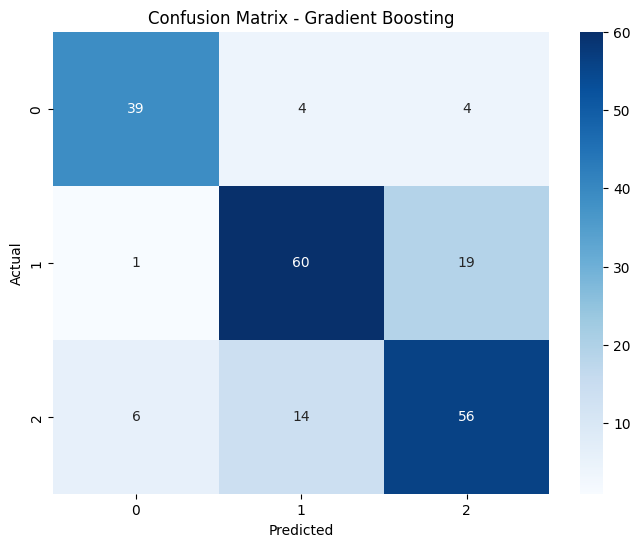


SVM Results:
Accuracy: 0.6749
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.61      0.88      0.72        80
           2       0.73      0.36      0.48        76

    accuracy                           0.67       203
   macro avg       0.71      0.69      0.67       203
weighted avg       0.69      0.67      0.65       203



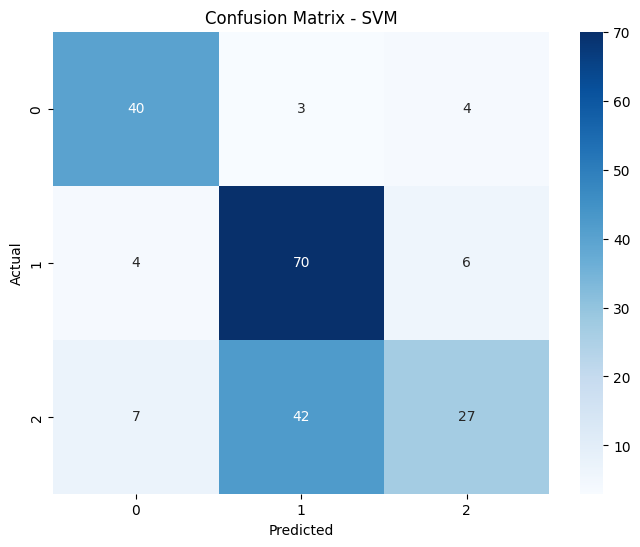


KNN Results:
Accuracy: 0.6946
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        47
           1       0.68      0.65      0.67        80
           2       0.65      0.64      0.65        76

    accuracy                           0.69       203
   macro avg       0.70      0.72      0.71       203
weighted avg       0.69      0.69      0.69       203



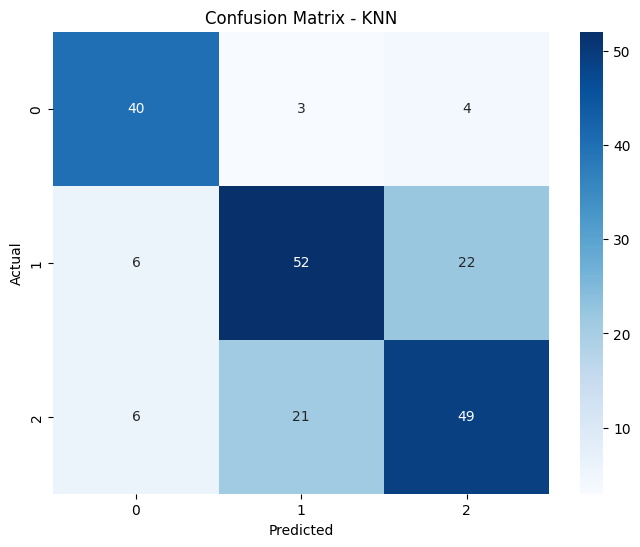


Naive Bayes Results:
Accuracy: 0.6108
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        47
           1       0.55      0.91      0.69        80
           2       0.56      0.18      0.28        76

    accuracy                           0.61       203
   macro avg       0.64      0.63      0.59       203
weighted avg       0.62      0.61      0.56       203



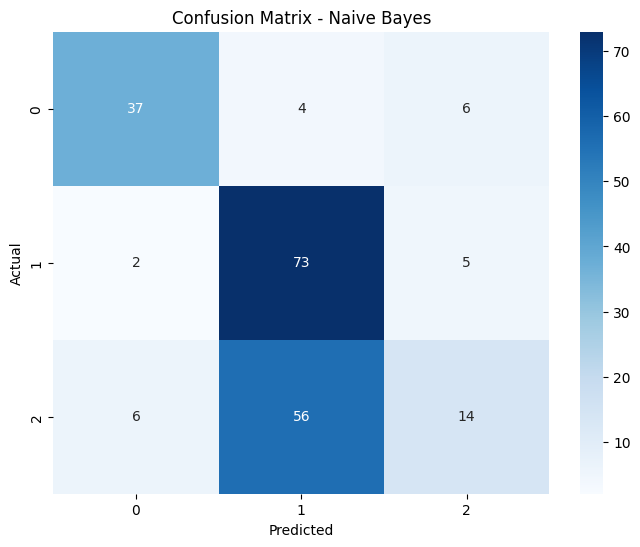


XGBoost Results:
Accuracy: 0.8325
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.85      0.80      0.83        80
           2       0.80      0.84      0.82        76

    accuracy                           0.83       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



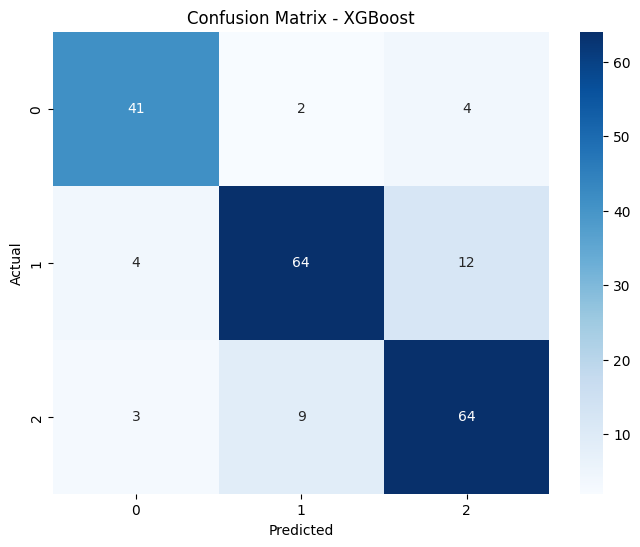

In [22]:
# Train and evaluate models
results = []

for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [23]:
# Neural Network
nn_model = create_nn_model((X_train_scaled.shape[1],))
history = nn_model.fit(X_train_resampled, y_train_resampled,
                       epochs=100, batch_size=32, validation_split=0.2, verbose=0)

y_pred = np.argmax(nn_model.predict(X_test_scaled), axis=-1)
nn_accuracy = accuracy_score(y_test, y_pred)
results.append(('Neural Network', nn_accuracy))

print("\nNeural Network Results:")
print(f"Accuracy: {nn_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step

Neural Network Results:
Accuracy: 0.6453
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        47
           1       0.58      0.85      0.69        80
           2       0.69      0.32      0.43        76

    accuracy                           0.65       203
   macro avg       0.68      0.67      0.64       203
weighted avg       0.66      0.65      0.62       203



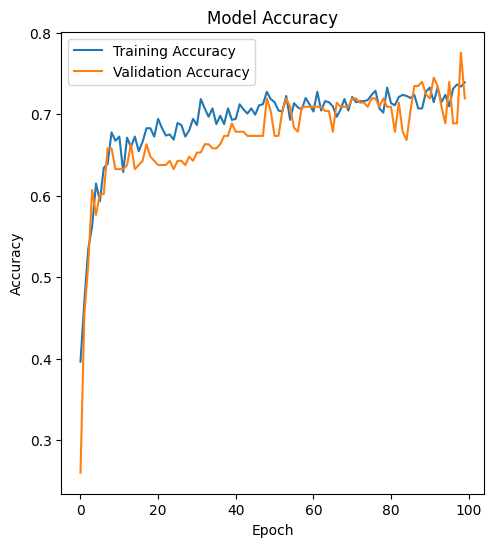

In [24]:
# Plot training 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

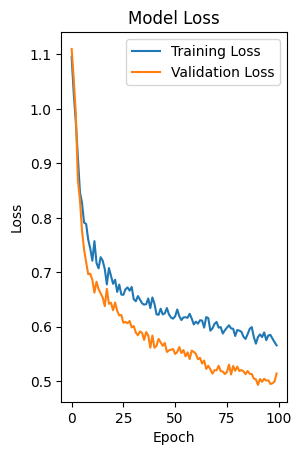

In [25]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Compare model performances
results.sort(key=lambda x: x[1], reverse=True)
for name, accuracy in results:
    print(f"{name}: {accuracy:.4f}")

XGBoost: 0.8325
Random Forest: 0.8030
Gradient Boosting: 0.7635
KNN: 0.6946
SVM: 0.6749
Neural Network: 0.6453
Logistic Regression: 0.6355
Naive Bayes: 0.6108


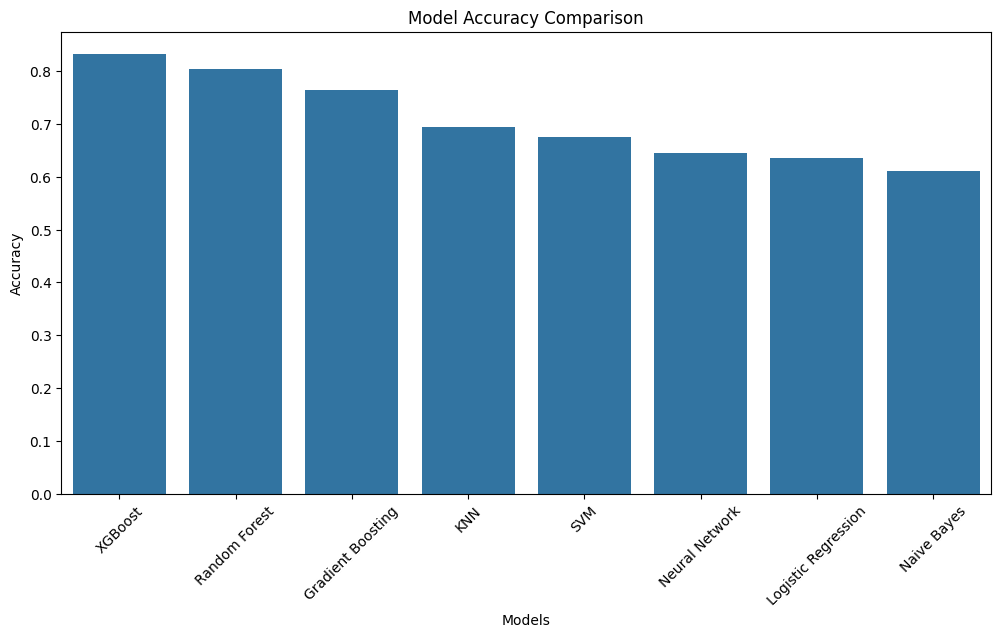

In [27]:
# Visualize model comparisons
plt.figure(figsize=(12, 6))
sns.barplot(x=[name for name, _ in results], y=[acc for _, acc in results])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Function to predict risk with similarity
def predict_risk_with_similarity(model, scaler, input_data, X_train, y_train, similarity_matrix, top_n=5):
    scaled_input = scaler.transform(input_data)
    

In [35]:
def find_similar_patients(patient_data, X_train, y_train, scaler, top_n=5):
    # Ensure patient_data is a 2D array
    if patient_data.ndim == 1:
        patient_data = patient_data.reshape(1, -1)
    
    # Scale the input data
    scaled_input = scaler.transform(patient_data)
    
    # Ensure X_train is also scaled
    X_train_scaled = scaler.transform(X_train)
    
    # Calculate similarities
    similarities = cosine_similarity(scaled_input, X_train_scaled)[0]
    
    # Get indices of top similar patients
    similar_indices = similarities.argsort()[::-1][:top_n]
    
    # Get similar patients and their risk levels
    similar_patients = X_train.iloc[similar_indices]
    similar_risks = y_train.iloc[similar_indices]
    
    return similar_patients, similar_risks

In [48]:
def predict_risk(model, input_data, scaler):
    # Scale the input data
    scaled_input = scaler.transform(input_data.reshape(1, -1))
    
    # Get model prediction
    if isinstance(model, Sequential):
        model_prediction = np.argmax(model.predict(scaled_input), axis=-1)[0]
    else:
        model_prediction = model.predict(scaled_input)[0]
    
    # Find similar patients (assuming you have a function for this)
    similar_patients, similar_risks = find_similar_patients(input_data)
    
    # Combine model prediction with similar patients' risk levels
    combined_prediction = np.mean([model_prediction, *similar_risks])
    risk_mapping = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}
    predicted_risk = risk_mapping[round(combined_prediction)]
    
    return predicted_risk, similar_patients, similar_risks

In [53]:
print(f"best_model type: {type(best_model)}")
print(f"scaler type: {type(scaler)}")
print(f"sample_input shape: {sample_input.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"similarity_matrix shape: {similarity_matrix.shape}")

best_model type: <class 'str'>
scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
sample_input shape: (1, 6)
X_train shape: (811, 6)
y_train shape: (811,)
similarity_matrix shape: (978, 978)


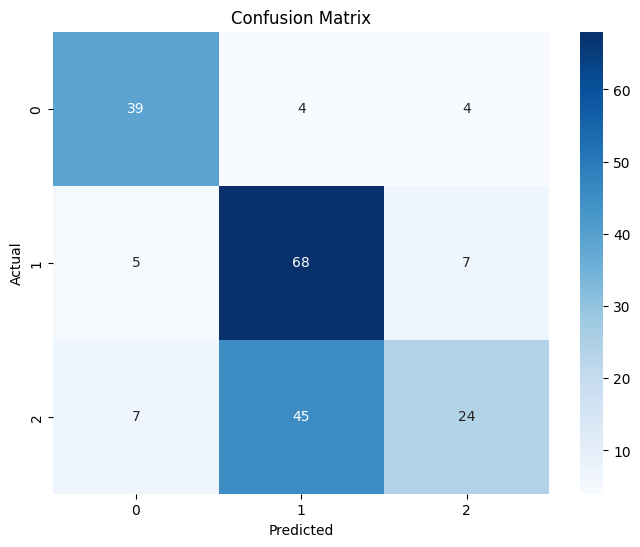

In [63]:
 #Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [66]:
 #Function to predict risk and provide recommendations
def predict_and_recommend(patient_data):
    patient_scaled = scaler.transform(patient_data)
    risk_probs = model.predict(patient_scaled)[0]
    predicted_risk = np.argmax(risk_probs)
    risk_mapping = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}
    
    print(f"Predicted Risk Level: {risk_mapping[predicted_risk]}")
    print(f"Risk Probabilities: Low - {risk_probs[0]:.2f}, Mid - {risk_probs[1]:.2f}, High - {risk_probs[2]:.2f}")
    
    recommendations = recommend_actions(predicted_risk, patient_data)
    print("\nRecommended Actions:")
    for i, action in enumerate(recommendations, 1):
        print(f"{i}. {action}")
    
    similar_patients, similar_risks = find_similar_patients(patient_data)
    print("\nSimilar Patient Profiles:")
    print(similar_patients)
    print("\nRisk Levels of Similar Patients:")
    print(similar_risks)



In [1]:


def find_similar_patients(patient_data, n=5):
    # Scale the patient data
    scaled_patient = scaler.transform(patient_data)
    
    # Calculate similarities
    similarities = cosine_similarity(scaled_patient, X_train)[0]
    
    # Get indices of most similar patients
    similar_indices = similarities.argsort()[::-1][:n]
    
    # Return similar patients and their risk levels
    return X_train.iloc[similar_indices], y_train.iloc[similar_indices]

In [71]:
# Example usage
sample_patient = pd.DataFrame([[25, 130, 80, 15, 98, 86]], columns=X.columns)
predict_and_recommend(sample_patient)

Predicted Risk Level: Low Risk
Risk Probabilities: Low - 1.00, Mid - 0.00, High - 0.00

Recommended Actions:
1. Continue regular prenatal check-ups
2. Maintain a balanced diet
3. Engage in light exercise as approved by your doctor
4. Stay hydrated
5. Get adequate rest

Similar Patient Profiles:
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
363   32         140           90  18.0      98.0         88
124   32         140           90  18.0      98.0         88
539   32         140           90  18.0      98.0         88
167   32         140           90  18.0      98.0         88
584   32         140           90  18.0      98.0         88

Risk Levels of Similar Patients:
363    0
124    0
539    0
167    0
584    0
Name: RiskLevel, dtype: int8
